We trained a gensim model with lemmatization and *not* filtering out stopwords across all research papers to get a better representation of words across all contexts. 


To determine how much the word embedding model captured we looked at similar words between our known promoters and inhibitors. Most similar words for the molecule 'socs3'. As you can see the words are meaningful meaning the model has a good vector representation of 'socs3': 

We also  plotted the word embeddings using PCA to determine if any meaningful clustering could be seen: 

We compared this word embedding model trained on all research papers to the gensim model just trained on the latest years of research papers (i.e the last time period binning see above) to see if the noise from earlier papers were resulting in worse representations of words. To evaluate which model was better we used the similarity scores between each known promtoer and inhibitor to the words 'promote' and 'inhibit'. If the 'promote' similarity score was greater than 'inhibit' we classified that molecule as a promoter and vice versa. We then compared these to the true labels of the molecule. Using the gensim model trained over the entire dataset we got an accuracy of 62%. With the gensim model trained just over the most recent years we got anaccuracy of 65%. 


**Conclusion:**   
With results of only 62% using all years and 65% using last binned years 
the GloVe approach doesn't seem too high yielding for differentiating promoters
and inhibitors

In [ ]:
import gensim 
import glob
import matplotlib.pyplot as plt
import math
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# All Years

In [ ]:
MODEL_PATH_ALL = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_All_Docs/"

In [ ]:
model_all_years = gensim.models.KeyedVectors.load(MODEL_PATH_ALL + "{}.wordvectors".format("All Papers"), mmap='r')

In [ ]:
print(model_all_years.most_similar("pten", topn=10))

[('deletion', 0.9459090232849121), ('overexpression', 0.9210734963417053), ('socs3', 0.9128459692001343), ('knockdown', 0.9029163122177124), ('mdm4', 0.8950291872024536), ('rhoa', 0.894497811794281), ('downregulation', 0.8859684467315674), ('s6k1', 0.8832250833511353), ('sac2', 0.8780266046524048), ('conditional', 0.8745607733726501)]


In [ ]:
print(model_all_years.most_similar("zymosan", topn=10))

[('icv', 0.8632676601409912), ('mif', 0.8569207191467285), ('spermidine', 0.8373506665229797), ('intraocular', 0.8289589285850525), ('lbp', 0.8278444409370422), ('circumcorneal', 0.8277182579040527), ('intravenous', 0.8153933882713318), ('intravitreal', 0.8114662766456604), ('intraventricular', 0.8008959293365479), ('gliotoxic', 0.7996237277984619)]


In [ ]:
print(model_all_years.most_similar("camp", topn=10))

[('amp', 0.910993218421936), ('cyclic', 0.903502345085144), ('phosphorylation', 0.8940731287002563), ('rhoa', 0.8853886127471924), ('mtor', 0.8653775453567505), ('akt', 0.8633681535720825), ('erk', 0.8608037829399109), ('creb', 0.8514261841773987), ('potentiate', 0.8499435186386108), ('rac1', 0.8494461178779602)]


In [ ]:
model_all_years.most_similar("socs3", topn=10)

[('pten', 0.9128459692001343),
 ('s6k1', 0.9103285074234009),
 ('deletion', 0.8966267704963684),
 ('mdm4', 0.8920930624008179),
 ('mtor', 0.8896791934967041),
 ('rhoa', 0.8735593557357788),
 ('conditional', 0.8732317090034485),
 ('downregulation', 0.872228741645813),
 ('overexpression', 0.8688384294509888),
 ('p50', 0.8614513874053955)]

In [ ]:
# See if word more strongly associated with promotion 
# or inhibition 

word1 = "promoter"
word2 = "inhibitor"
keywords = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
correct_class = [1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1]

for word in keywords:
  print("{}: {}: {} {}: {}".format(word, word1, model_all_years.similarity(word, word1), word2, model_all_years.similarity(word, word2)))


netrin: promoter: 0.7929757833480835 inhibitor: 0.5877072811126709
ephrin: promoter: 0.7169414162635803 inhibitor: 0.5274983048439026
laminin: promoter: 0.6654402017593384 inhibitor: 0.5170198082923889
tenascin: promoter: 0.6945047974586487 inhibitor: 0.7073550224304199
cspg: promoter: 0.6860247850418091 inhibitor: 0.776049792766571
zymosan: promoter: 0.4547797441482544 inhibitor: 0.38716182112693787
camp: promoter: 0.6513898372650146 inhibitor: 0.5930249094963074
pten: promoter: 0.8081142902374268 inhibitor: 0.671783983707428
cntf: promoter: 0.6829257607460022 inhibitor: 0.5375758409500122
lif: promoter: 0.6955140233039856 inhibitor: 0.5627672672271729
oncomodulin: promoter: 0.5298385620117188 inhibitor: 0.49610114097595215
stat3: promoter: 0.7921655178070068 inhibitor: 0.5453143119812012
socs3: promoter: 0.6817240715026855 inhibitor: 0.6303980350494385
rhoa: promoter: 0.776263415813446 inhibitor: 0.7321050763130188
rock: promoter: 0.6839036345481873 inhibitor: 0.7412859797477722
y276

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

In [ ]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

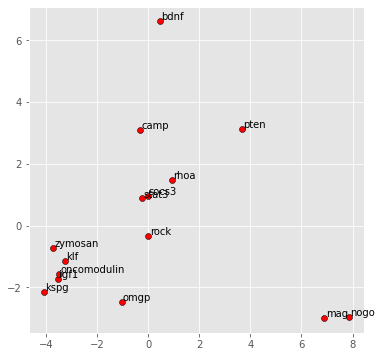

In [ ]:
display_pca_scatterplot(model_all_years, keywords)

# Binned Time Periods

In [ ]:
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_Without_Stopwords/"
time_per_list = ['1776-1832', '1835-1846', '1847-1859', '1860-1872', '1874-1884', '1885-1894', '1895-1902', '1903-1910', '1911-1918', '1919-1926', '1927-1935', '1936-1943', '1944-1974', '1977-1988', '1989-1996', '1997-2015']
model_files = glob.glob(MODEL_PATH + "*.wordvectors")
model_files

['/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_Without_Stopwords/1776-1832.wordvectors',
 '/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_Without_Stopwords/1835-1846.wordvectors',
 '/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_Without_Stopwords/1847-1859.wordvectors',
 '/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_Without_Stopwords/1860-1872.wordvectors',
 '/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_Without_Stopwords/1874-1884.wordvectors',
 '/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_Without_Stopwords/1885-1894.wordvectors',
 '/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_Without_Stopwords/1895-1902.wordvectors',
 '/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Mod

In [ ]:
"rock, camp, cntf, mag, netrin, tenascin, cspg, lif, lar, bdnf" 

'rock, camp, cntf, mag, netrin, tenascin, cspg, lif, lar, bdnf'

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.12352692, 0.23896338]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002101942, 0.06215895]


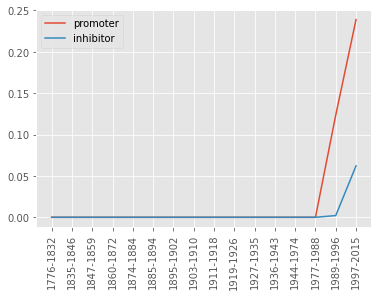

In [ ]:
keyword = "lif"
word1 = "promoter"
word2 = "inhibitor"
word1_similarity = [] 
word2_similarity = [] 
for i, model_path in enumerate(model_files):
  wv = gensim.models.KeyedVectors.load(model_path, mmap='r')
  try:
    p_similarity = wv.similarity(keyword, word1)
    i_similarity = wv.similarity(keyword, word2)
    word1_similarity.append(abs(p_similarity))
    word2_similarity.append(abs(i_similarity))
    # print("\t" + str(similarity))
  except KeyError:
    # print("\tWord not in vocabulary")
    word1_similarity.append(0) 
    word2_similarity.append(0) 

print(word1_similarity)
print(word2_similarity)
plt.xticks(rotation=90)
plt.plot(time_per_list, word1_similarity, label="promoter") 
plt.plot(time_per_list, word2_similarity, label="inhibitor") 
plt.legend()

# Comparing Both

In [ ]:
word1 = "promoter"
word2 = "inhibitor"
answer_arr = [] 
for word, correct in zip(keywords, correct_class): 
  print("{}: {}".format(word, correct))
  pred_class = 0 
  if(model_all_years.similarity(word, word1) > model_all_years.similarity(word, word2)):
    pred_class = 1

  if pred_class == correct:
    print("CORRECT")
    answer_arr.append(1)
  else:
    print("INCORRECT")
    answer_arr.append(0)
  
  print("{}: {}: {} {}: {}".format(word, word1, model_all_years.similarity(word, word1), word2, model_all_years.similarity(word, word2)))
  print("---")

print("{}/{}: {}".format(answer_arr.count(1), len(keywords), answer_arr.count(1)/len(keywords)))

netrin: 1
CORRECT
netrin: promoter: 0.7929757833480835 inhibitor: 0.5877072811126709
---
ephrin: 0
INCORRECT
ephrin: promoter: 0.7169414162635803 inhibitor: 0.5274983048439026
---
laminin: 1
CORRECT
laminin: promoter: 0.6654402017593384 inhibitor: 0.5170198082923889
---
tenascin: 0
CORRECT
tenascin: promoter: 0.6945047974586487 inhibitor: 0.7073550224304199
---
cspg: 0
CORRECT
cspg: promoter: 0.6860247850418091 inhibitor: 0.776049792766571
---
zymosan: 1
CORRECT
zymosan: promoter: 0.4547797441482544 inhibitor: 0.38716182112693787
---
camp: 1
CORRECT
camp: promoter: 0.6513898372650146 inhibitor: 0.5930249094963074
---
pten: 1
CORRECT
pten: promoter: 0.8081142902374268 inhibitor: 0.671783983707428
---
cntf: 1
CORRECT
cntf: promoter: 0.6829257607460022 inhibitor: 0.5375758409500122
---
lif: 1
CORRECT
lif: promoter: 0.6955140233039856 inhibitor: 0.5627672672271729
---
oncomodulin: 1
CORRECT
oncomodulin: promoter: 0.5298385620117188 inhibitor: 0.49610114097595215
---
stat3: 1
CORRECT
stat3:

In [ ]:
model_files[-1]

'/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_Without_Stopwords/1997-2015.wordvectors'

In [ ]:
word1 = "promoter"
word2 = "inhibitor"
answer_arr = [] 

for word, correct in zip(keywords, correct_class): 
  print("{}: {}".format(word, correct))
  model = gensim.models.KeyedVectors.load(model_files[-1], mmap='r') # use last time range

  pred_class = 0 
  if(model.similarity(word, word1) > model.similarity(word, word2)):
    pred_class = 1

  if pred_class == correct:
    print("CORRECT")
    answer_arr.append(1)
  else:
    print("INCORRECT")
    answer_arr.append(0) 
  
  print("{}: {}: {} {}: {}".format(word, word1, model.similarity(word, word1), word2, model.similarity(word, word2)))
  print("---")

print("{}/{}: {}".format(answer_arr.count(1), len(keywords), answer_arr.count(1)/len(keywords)))

netrin: 1
CORRECT
netrin: promoter: 0.13301391899585724 inhibitor: -0.032464202493429184
---
ephrin: 0
INCORRECT
ephrin: promoter: 0.07593414187431335 inhibitor: 0.003063279204070568
---
laminin: 1
INCORRECT
laminin: promoter: 0.07203953713178635 inhibitor: 0.18688775599002838
---
tenascin: 0
CORRECT
tenascin: promoter: 0.05861133337020874 inhibitor: 0.3037424087524414
---
cspg: 0
CORRECT
cspg: promoter: 0.04765060544013977 inhibitor: 0.29835331439971924
---
zymosan: 1
CORRECT
zymosan: promoter: 0.11865945905447006 inhibitor: -0.1070094034075737
---
camp: 1
INCORRECT
camp: promoter: 0.16808992624282837 inhibitor: 0.18421193957328796
---
pten: 1
CORRECT
pten: promoter: 0.3484656512737274 inhibitor: 0.28232911229133606
---
cntf: 1
CORRECT
cntf: promoter: 0.1979450285434723 inhibitor: 0.12184245139360428
---
lif: 1
CORRECT
lif: promoter: 0.23896338045597076 inhibitor: 0.06215894967317581
---
oncomodulin: 1
INCORRECT
oncomodulin: promoter: 0.1394304633140564 inhibitor: 0.17855492234230042
